# Problem - 1 | Description

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

## Importing Libaries 

In [457]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 
from sklearn.model_selection import GridSearchCV

## 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [358]:
bank = pd.read_csv("bank_marketing_part1_Data.csv")

In [359]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### Basic Checks

In [360]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


#### Observations 
1. Dataset has a total of 210 rows and 7 columns.
2. All the fields are of float types.
3. There is no missing values.

### Checking for duplicates

In [361]:
bank.duplicated().sum()

0

Since, the count is 0, hence no duplicate is present here.
### Checking for Outleirs 
As all the features are floats, hence we will plot box plot to find outliers if any.

In [362]:
Features = list(bank.columns)

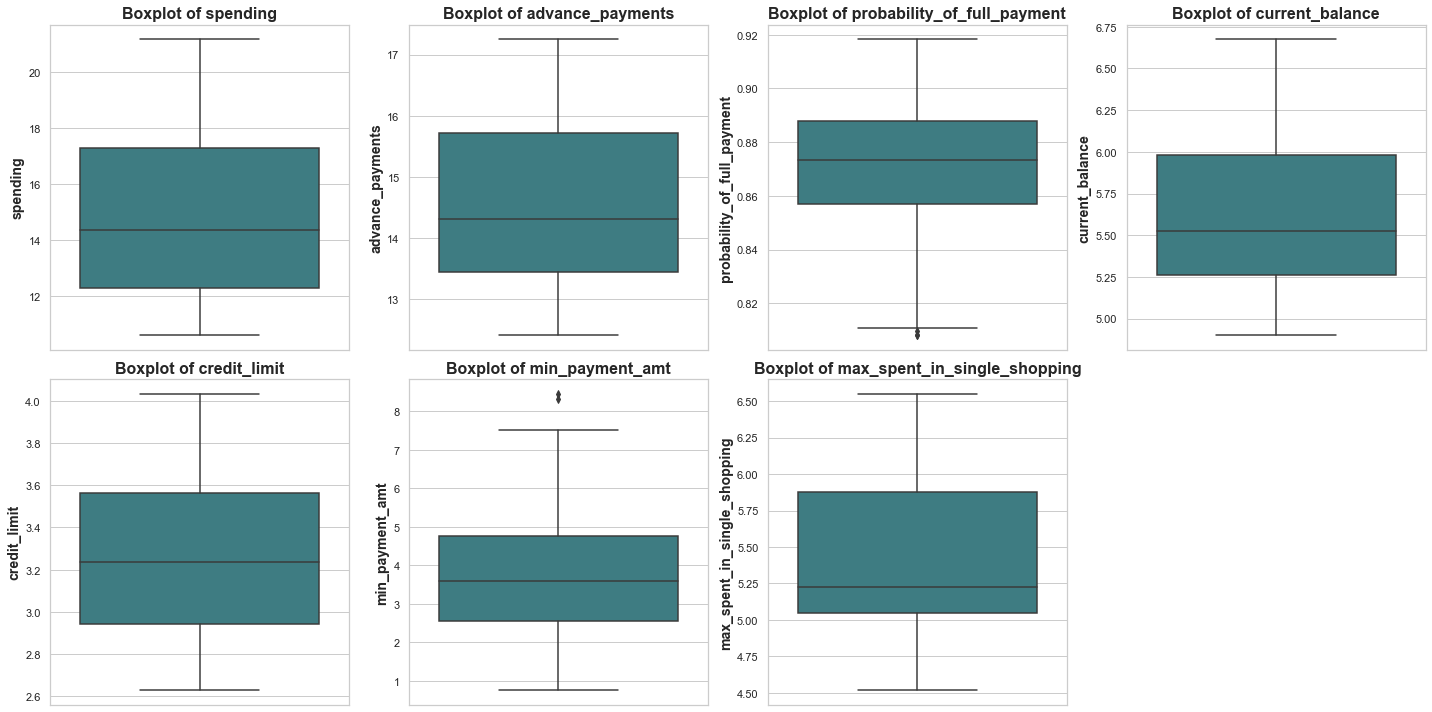

In [363]:
x = 0
plt.figure(figsize = (20,10))
for i in range(0,len(Features)):
        x = x + 1
        plt.subplot(2,4,x)
        sns.boxplot(y = bank[Features[i]], data = bank,palette = 'crest')
        plt.title(f"Boxplot of {Features[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel(Features[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

#### Observations:
1. Outliers are present for probability_of_full_payment and min_payment_amt.
2. Outlier treatment can be done for the mentioned feilds.

#### Applying Outlier treament

In [364]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [365]:
for i in Features:
    lr, ur = detect_outliers(bank[i])
    bank[i] = np.where(bank[i] > ur, ur,bank[i])
    bank[i] = np.where(bank[i] < lr, lr,bank[i])

#### Verifying the outleirs for all the features

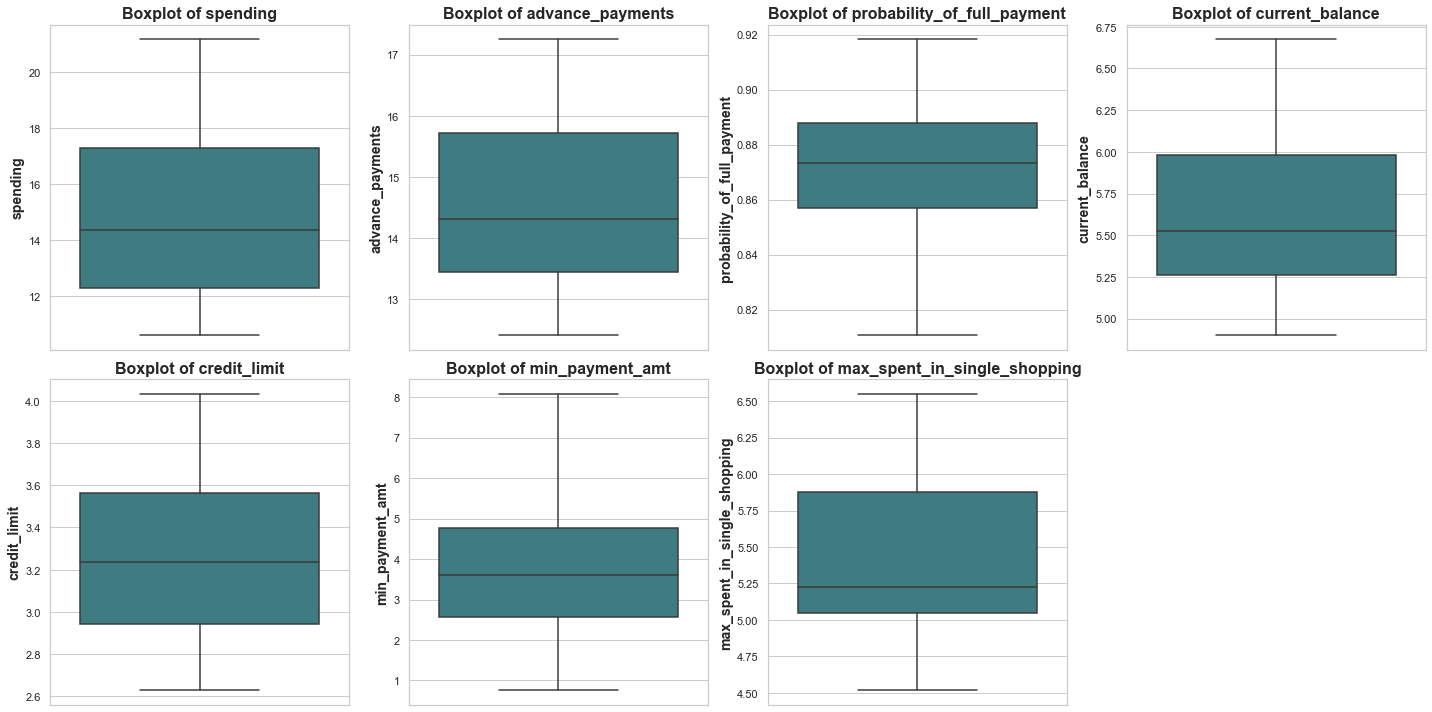

In [366]:
x = 0
plt.figure(figsize = (20,10))
for i in range(0,len(Features)):
        x = x + 1
        plt.subplot(2,4,x)
        sns.boxplot(y = bank[Features[i]], data = bank,palette = 'crest')
        plt.title(f"Boxplot of {Features[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel(Features[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

### Checking Missing Values

In [367]:
bank.isnull().any()

spending                        False
advance_payments                False
probability_of_full_payment     False
current_balance                 False
credit_limit                    False
min_payment_amt                 False
max_spent_in_single_shopping    False
dtype: bool

No missing values present in the data frame.

### Univariate Analysis

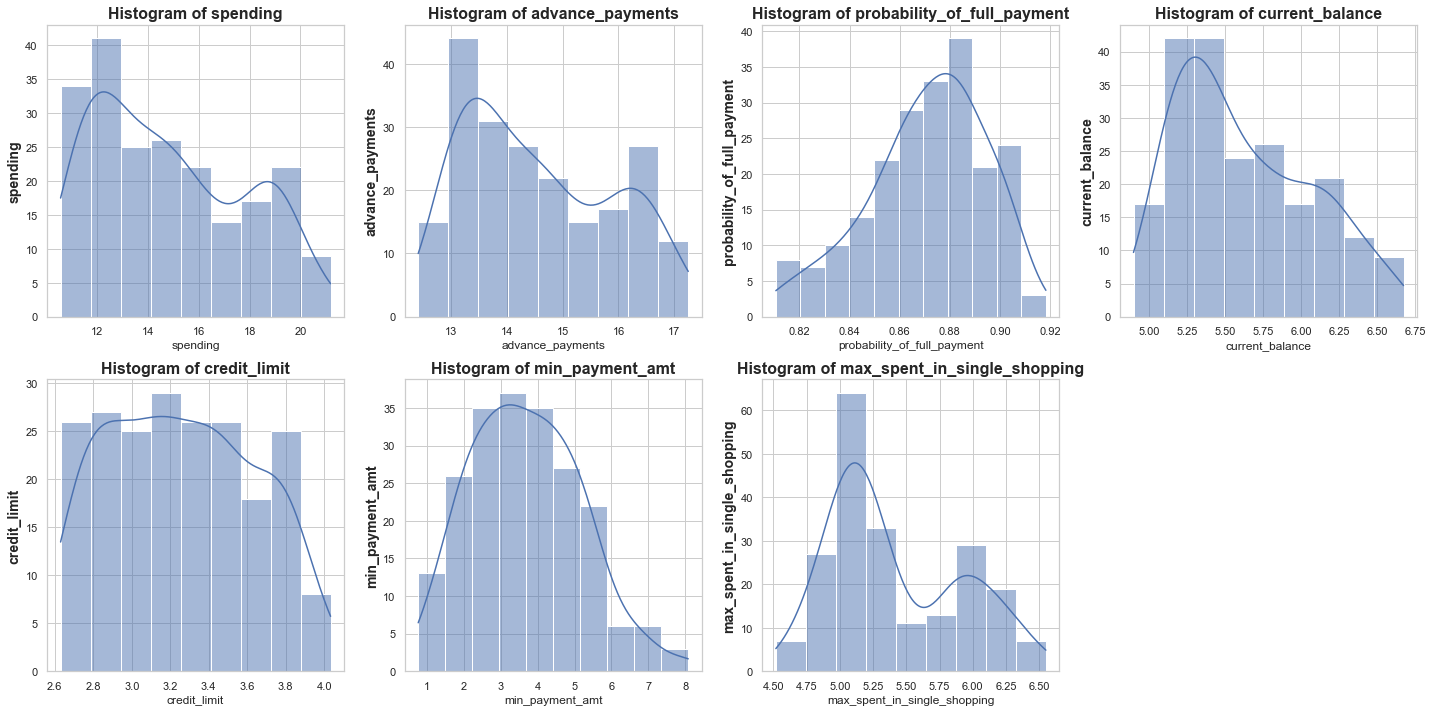

In [368]:
x = 0
plt.figure(figsize = (20,10))
for i in range(0,len(Features)):
        x = x + 1
        plt.subplot(2,4,x)
        sns.histplot(bank[Features[i]], kde=True)
        plt.title(f"Histogram of {Features[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel(Features[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

#### Calculate Skewness of the Fields

In [369]:
from scipy.stats import skew

In [370]:
for i in Features:
    print(f"Skewness of {i} is {skew(bank[i])}")

Skewness of spending is 0.39702715402072153
Skewness of advance_payments is 0.38380604212562563
Skewness of probability_of_full_payment is -0.5190516297742105
Skewness of current_balance is 0.5217206481959235
Skewness of credit_limit is 0.13341648969738135
Skewness of min_payment_amt is 0.35742468670751903
Skewness of max_spent_in_single_shopping is 0.5578758322317954


### Bivariant Analysis
This can be done both by PairPlot and Correlation Heat Map
#### Pair Plot

<Figure size 720x2160 with 0 Axes>

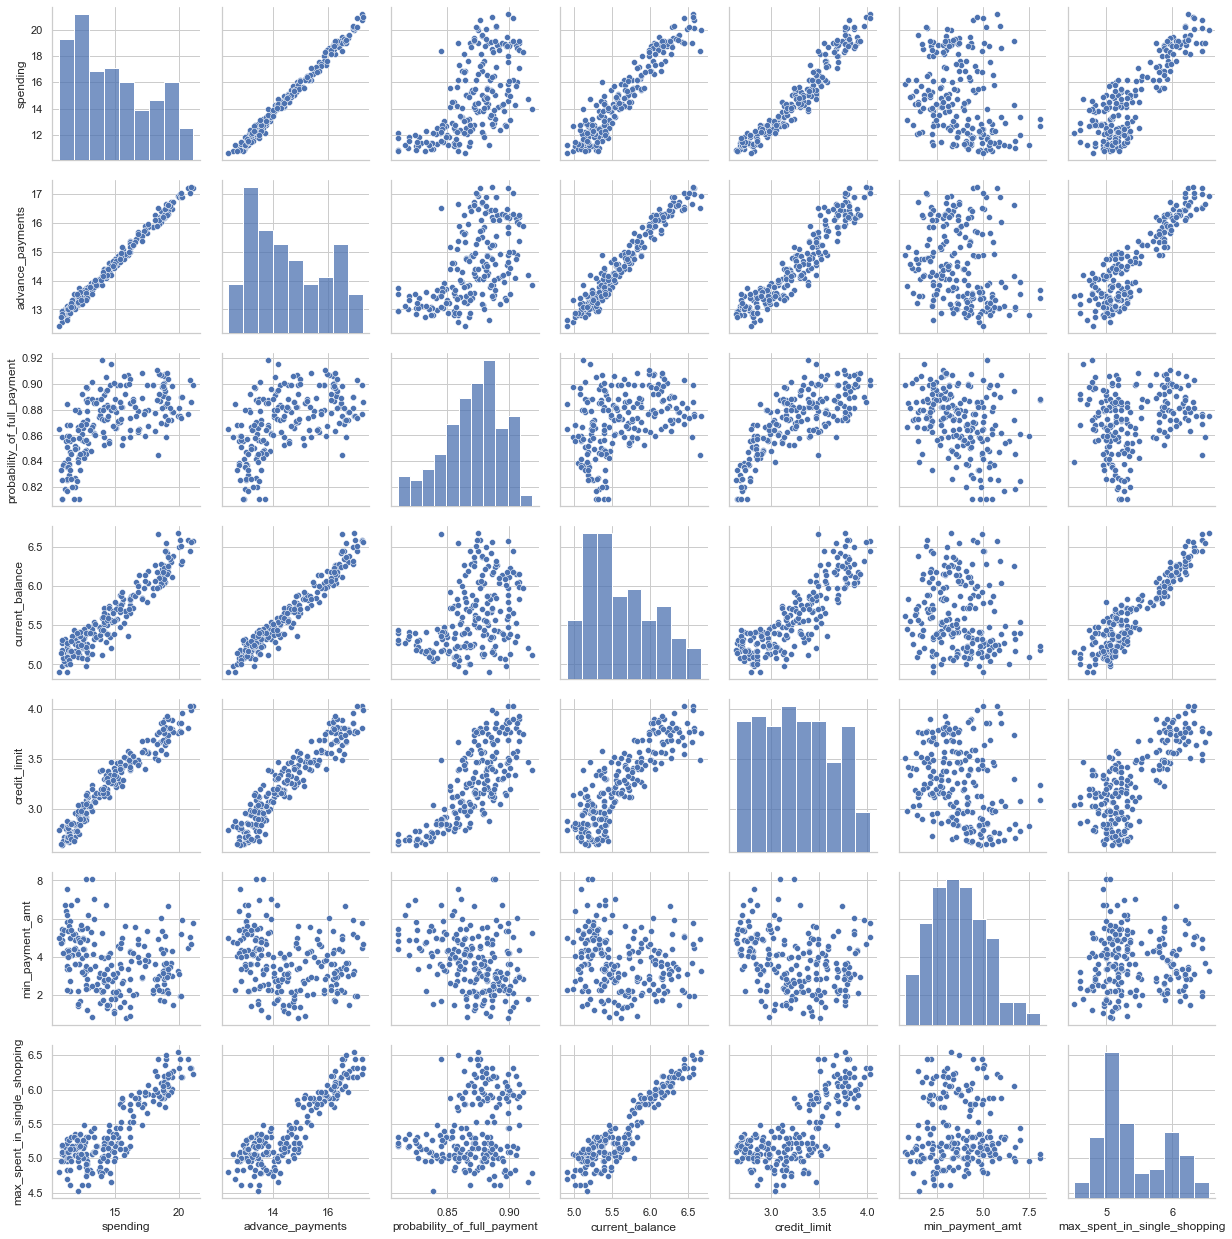

In [371]:
plt.figure(figsize = (10,30));
sns.pairplot(data = bank);
plt.show();

#### Observations:
1. Positive cavairance can be observed in spending-advance_payments, current_balance-spending, spending-credit_limit etc.
2. Negative Covairance can be observed in probability_of_full_payment-min_payment_amt etc.
3. No cavariance seen in max_spent_in_single_shopping-probability_of_full_payment, probability_of_full_payment-credit_limit etc.

#### Heat Map

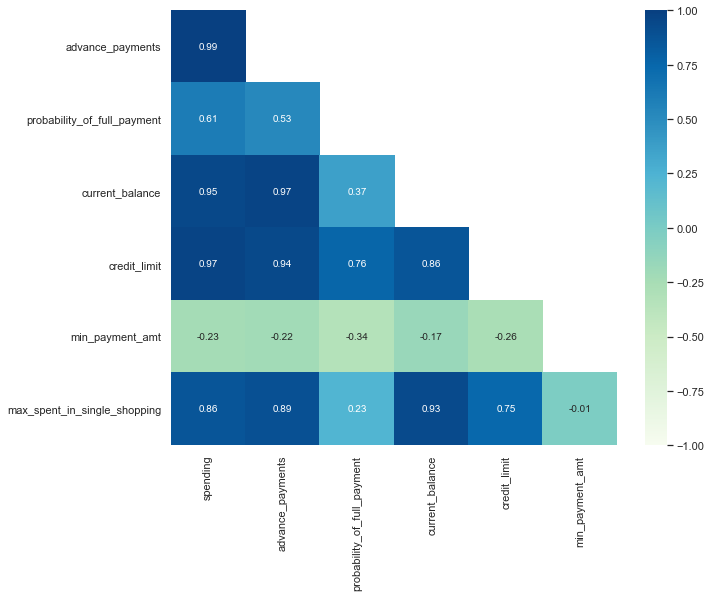

In [372]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(bank.corr(), dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = bank.corr().iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='GnBu',
           vmin=-1, vmax=1)
# yticks
#plt.yticks(rotation=0)
plt.show()

#### Observations
1. Strong positive correlation can be observed in spending-advance_payments, spending-credit_limit , spending-current_balance, current_balance-max_spent_in_single_shopping.
2. No correlation is observed in fields like probability_of_full_payment-max_spent_in_single_shopping, min_payment_amt-max_spent_in_single_shopping etc.
3. No strong negative correlations.

## 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [373]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.590000,12.27000,14.35500,17.305000,21.180000
advance_payments,210.0,14.559286,1.305959,12.410000,13.45000,14.32000,15.715000,17.250000
probability_of_full_payment,210.0,0.871025,0.023560,0.810588,0.85690,0.87345,0.887775,0.918300
current_balance,210.0,5.628533,0.443063,4.899000,5.26225,5.52350,5.979750,6.675000
credit_limit,210.0,3.258605,0.377714,2.630000,2.94400,3.23700,3.561750,4.033000
min_payment_amt,210.0,3.697288,1.494689,0.765100,2.56150,3.59900,4.768750,8.079625
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.519000,5.04500,5.22300,5.877000,6.550000


**As observed in the above descriptive statistics, the range of fields vary from one another. Hence, we would require scaling for clustering.**
### Scaling

In [374]:
from sklearn.preprocessing import StandardScaler

In [375]:
sc = StandardScaler()
bank_scaled = pd.DataFrame(sc.fit_transform(bank),columns = 
bank.columns)
 

In [376]:
bank_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.638372e-15,1.002389,-2.571391,-0.600968,0.103172,0.712647,2.011371
current_balance,210.0,-1.358702e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.790757e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,1.554312e-16,1.002389,-1.966425,-0.761698,-0.065915,0.718559,2.938945
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [377]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [378]:
wardlink = linkage(bank_scaled, method='ward')

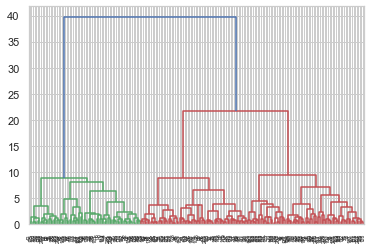

In [379]:
dend = dendrogram(wardlink)

As here, we have a lot of clusters, hen we can get a clearer dendogram as :

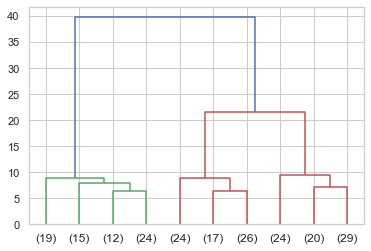

In [380]:
dend = dendrogram(wardlink, truncate_mode= 'lastp', p = 10)

From the above dendogram, we can choose 3 clusters

In [381]:
from scipy.cluster.hierarchy import fcluster

In [382]:
clusters = fcluster(wardlink , 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [383]:
bank['clusters'] = clusters

In [384]:
bank_scaled['clusters'] = clusters

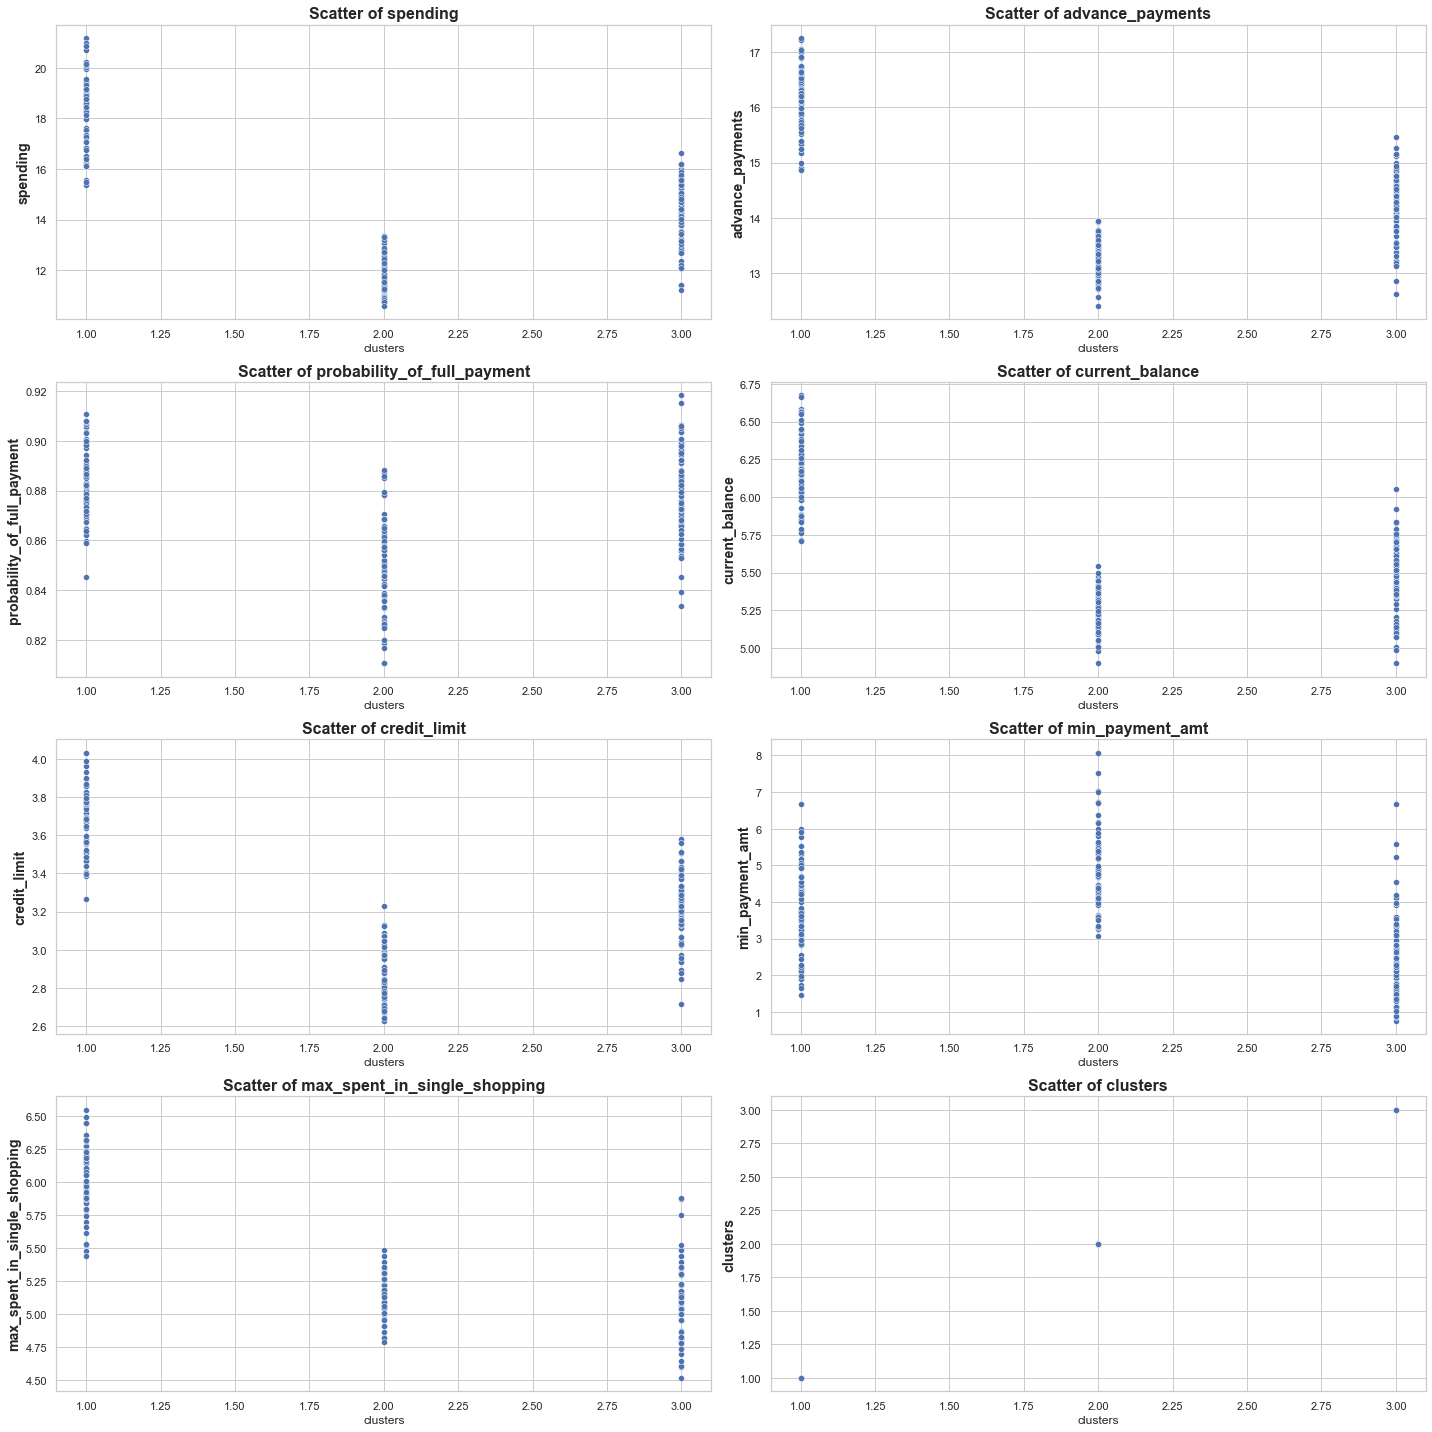

In [385]:
Features= list(bank.columns)
x = 0
plt.figure(figsize = (20,20))
for i in range(0,len(Features)):
        x = x + 1
        plt.subplot(4,2,x)
        sns.scatterplot(y = bank[Features[i]], x = bank['clusters'])
        plt.title(f"Scatter of {Features[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel(Features[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

In [386]:
bank.groupby(by = 'clusters').sum()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters,,,,,,,
1,1286.00,1130.18,61.908000,431.072,257.924,254.74100,421.216
2,795.45,888.22,56.826363,351.009,190.852,331.00025,343.188
3,1036.53,1039.05,64.180900,399.911,235.531,190.68920,371.291


#### Observations:
1. Cluster 1
    1. Highest : spending, advance_payments, current_balance, credit_limit and max_spent_in_single_shopping 
    2. Moderate : probability_of_full_payment, min_payment_amt.
2. Cluster 2
    1. Highest : min_payment_amt.
    2. Lowest : spending, advance_payments, current_balance, credit_limit, max_spent_in_single_shopping and probability_of_full_payment
3. Cluster 3
    1. Highest : probability_of_full_payment.
    2. Moderate : spending, advance_payments, current_balance, credit_limit and max_spent_in_single_shopping.
    3. Lowest : min_payment_amt
    
## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [387]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [388]:
wss = []
score = []
num = []
columns = ['Inertia']#, ]
for i in range(2, 11):
    num.append(i)
    KM = KMeans(n_clusters= i)
    KM.fit(bank_scaled)
    wss.append(KM.inertia_)
    labels = KM.labels_
    score.append(silhouette_score(bank_scaled, labels))
data = np.array([wss])
data = data.reshape(9,1)
k_criteria = pd.DataFrame(data = data, columns = columns)
k_criteria['silhouette_score'] = score
k_criteria['Number of Clusters'] = num


In [389]:
k_criteria

,Inertia,silhouette_score,Number of Clusters
0,708.499737,0.496583,2
1,441.127253,0.451895,3
2,390.103578,0.363339,4
3,347.234376,0.299495,5
4,304.559889,0.265280,6
5,276.908733,0.271725,7
6,253.723665,0.259807,8
7,234.293988,0.262032,9
8,212.559211,0.263388,10


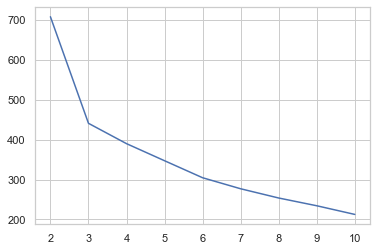

In [390]:
plt.plot(range(2,11), wss);

From above graph, I choose clusters = 2

In [391]:
k_means = KMeans(n_clusters = 2)
k_means.fit(bank_scaled)
labels = k_means.labels_

Verifying the cluster mapping

In [392]:
silhouette_score(bank_scaled, labels)

0.4965830066767461

In [393]:
sil_width = silhouette_samples(bank_scaled,labels)
sil_width.min()

0.0012474141995472688

In [394]:
bank['K_Clusters'] = labels

As, we can observe, the following parameters

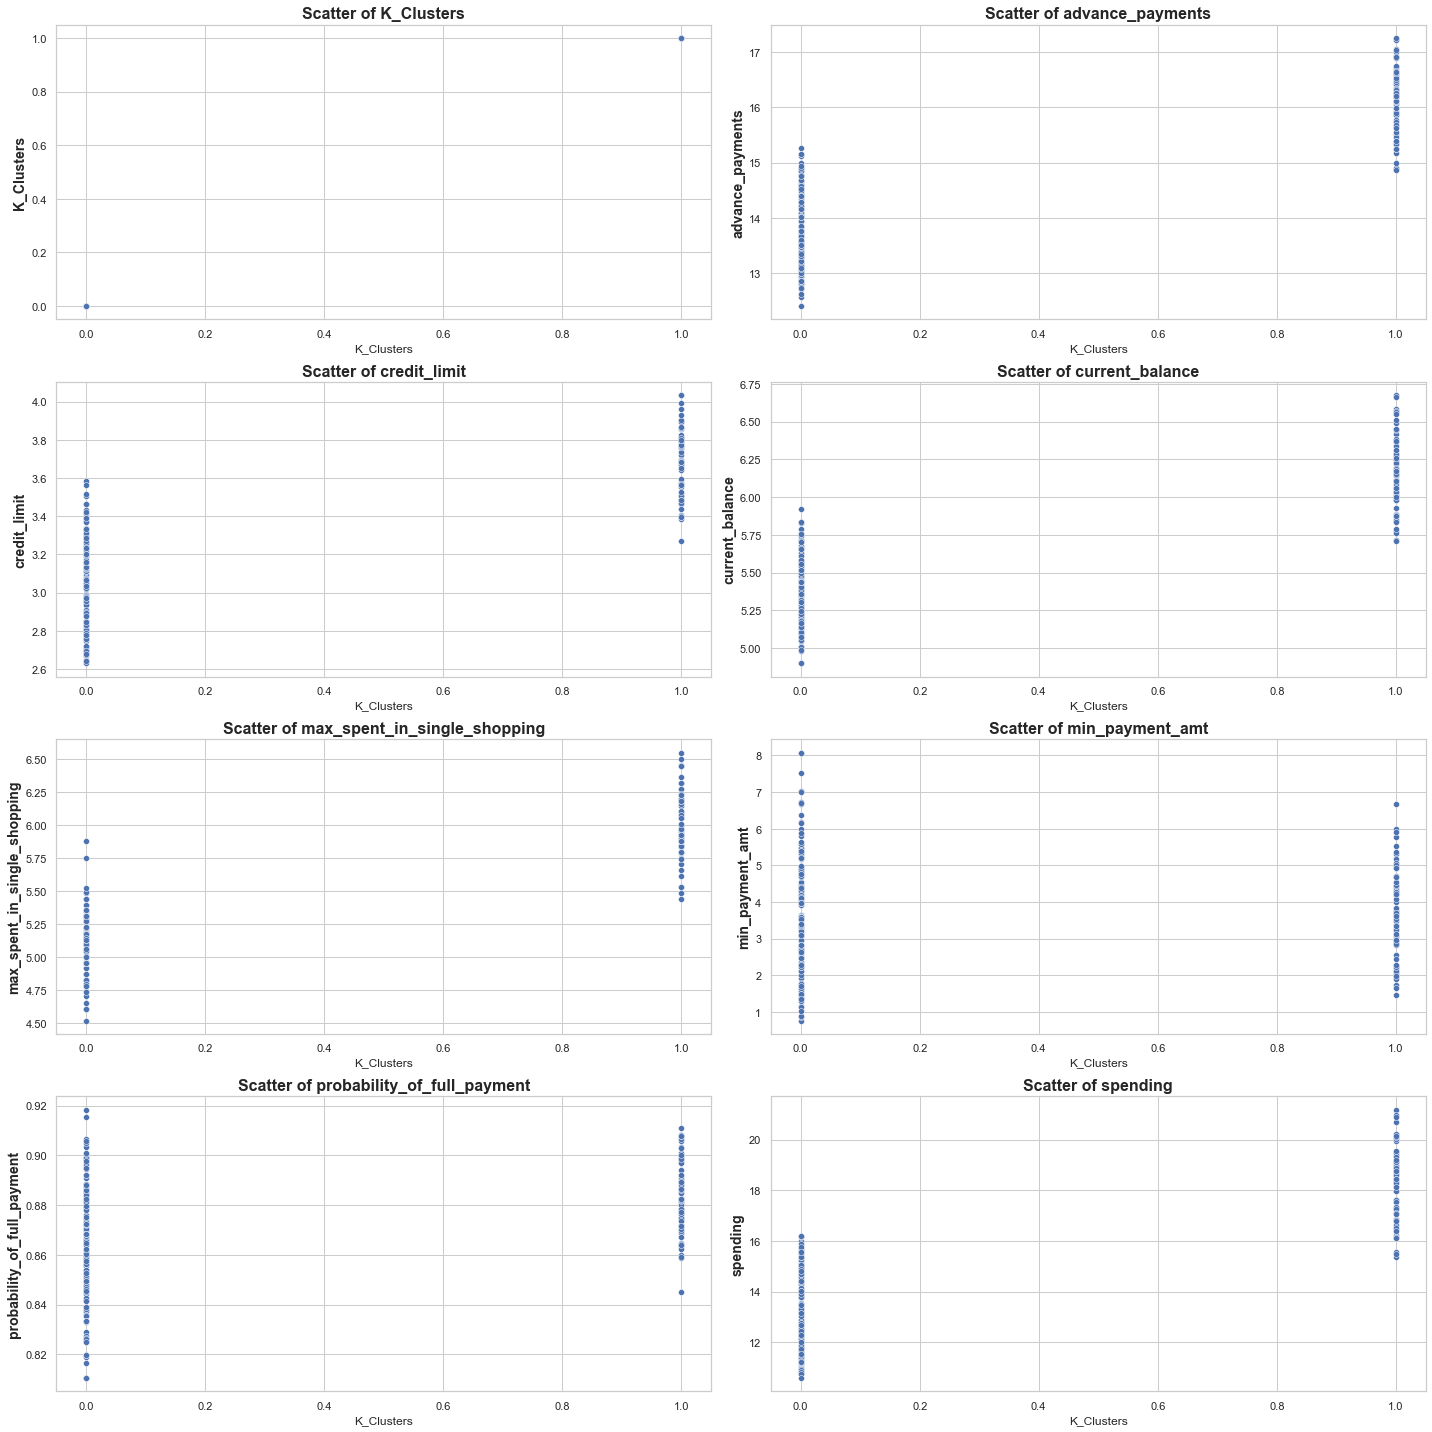

In [395]:
Features= list(bank[bank.columns.difference(['clusters'])].columns)
x = 0
plt.figure(figsize = (20,20))
for i in range(0,len(Features)):
        x = x + 1
        plt.subplot(4,2,x)
        sns.scatterplot(y = bank[Features[i]], x = bank['K_Clusters'])
        plt.title(f"Scatter of {Features[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel(Features[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

In [396]:
bank.groupby(by = 'K_Clusters').sum()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
K_Clusters,,,,,,,,
0,1815.35,1911.81,120.132563,744.867,422.918,519.64945,708.602,350
1,1302.63,1145.64,62.782700,437.125,261.389,256.78100,427.093,73


#### Observations:
1. Cluster 0
    1. All the values in this cluster is at lower end.
2. Cluster 1
    1. All the values in this cluster is at higher end.
    

## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Let's find out the different ways, these cluster divide the data.


In [397]:
pd.DataFrame(bank.groupby(by = 'K_Clusters').mean()[['spending','advance_payments']].reset_index()).style.hide_index()

K_Clusters,spending,advance_payments
0,13.060072,13.754029
1,18.346901,16.135775


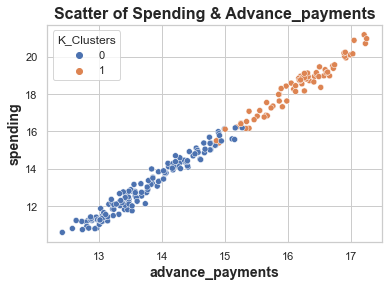

In [398]:
sns.scatterplot(y = bank['spending'], x = bank['advance_payments']  , hue = bank['K_Clusters']);
plt.title(f"Scatter of Spending & Advance_payments", fontsize = 16, fontweight='bold');
plt.ylabel('spending', fontsize = 14, fontweight='bold');
plt.xlabel('advance_payments', fontsize = 14, fontweight='bold');

In [399]:
pd.DataFrame(bank.groupby(by = 'K_Clusters').mean()[['advance_payments','probability_of_full_payment']].reset_index()).style.hide_index()

K_Clusters,advance_payments,probability_of_full_payment
0,13.754029,0.864263
1,16.135775,0.884263


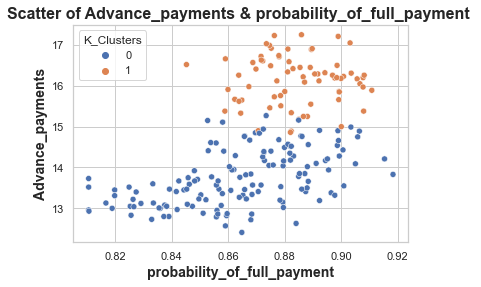

In [400]:
sns.scatterplot(y = bank['advance_payments'], x = bank['probability_of_full_payment']  , hue = bank['K_Clusters']);
plt.title(f"Scatter of Advance_payments & probability_of_full_payment ", fontsize = 16, fontweight='bold');
plt.ylabel('Advance_payments', fontsize = 14, fontweight='bold');
plt.xlabel('probability_of_full_payment', fontsize = 14, fontweight='bold');

In [401]:
pd.DataFrame(bank.groupby(by = 'K_Clusters').mean()[['probability_of_full_payment','current_balance']].reset_index()).style.hide_index()

K_Clusters,probability_of_full_payment,current_balance
0,0.864263,5.358755
1,0.884263,6.156690


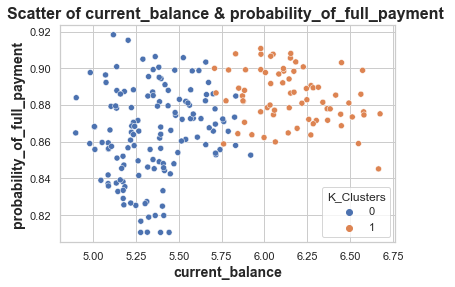

In [402]:
sns.scatterplot(x = bank['current_balance'], y = bank['probability_of_full_payment']  , hue = bank['K_Clusters']);
plt.title(f"Scatter of current_balance & probability_of_full_payment ", fontsize = 16, fontweight='bold');
plt.xlabel('current_balance', fontsize = 14, fontweight='bold');
plt.ylabel('probability_of_full_payment', fontsize = 14, fontweight='bold');

In [403]:
pd.DataFrame(bank.groupby(by = 'K_Clusters').mean()[['current_balance','credit_limit']].reset_index()).style.hide_index()

K_Clusters,current_balance,credit_limit
0,5.358755,3.042576
1,6.156690,3.681535


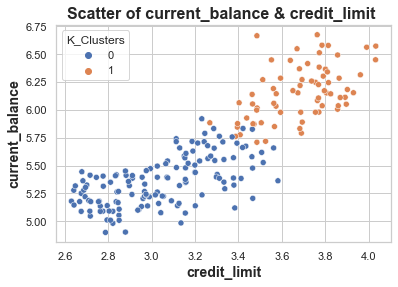

In [404]:
sns.scatterplot(y = bank['current_balance'], x = bank['credit_limit']  , hue = bank['K_Clusters']);
plt.title(f"Scatter of current_balance & credit_limit ", fontsize = 16, fontweight='bold');
plt.ylabel('current_balance', fontsize = 14, fontweight='bold');
plt.xlabel('credit_limit', fontsize = 14, fontweight='bold');

In [405]:
pd.DataFrame(bank.groupby(by = 'K_Clusters').mean()[['credit_limit','min_payment_amt']].reset_index()).style.hide_index()

K_Clusters,credit_limit,min_payment_amt
0,3.042576,3.738485
1,3.681535,3.616634


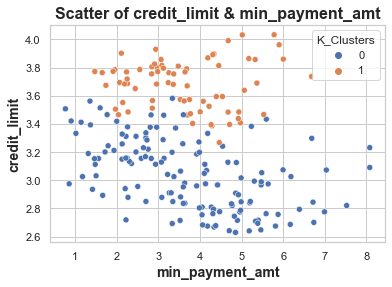

In [406]:
sns.scatterplot(x = bank['min_payment_amt'], y = bank['credit_limit']  , hue = bank['K_Clusters']);
plt.title(f"Scatter of credit_limit & min_payment_amt", fontsize = 16, fontweight='bold');
plt.ylabel('credit_limit', fontsize = 14, fontweight='bold');
plt.xlabel('min_payment_amt', fontsize = 14, fontweight='bold');

In [407]:
pd.DataFrame(bank.groupby(by = 'K_Clusters').mean()[['min_payment_amt','max_spent_in_single_shopping']].reset_index()).style.hide_index()

K_Clusters,min_payment_amt,max_spent_in_single_shopping
0,3.738485,5.097856
1,3.616634,6.015394


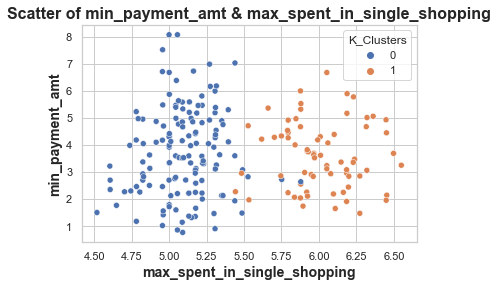

In [408]:
sns.scatterplot(y = bank['min_payment_amt'], x = bank['max_spent_in_single_shopping']  , hue = bank['K_Clusters']);
plt.title(f"Scatter of min_payment_amt & max_spent_in_single_shopping", fontsize = 16, fontweight='bold');
plt.ylabel('min_payment_amt', fontsize = 14, fontweight='bold');
plt.xlabel('max_spent_in_single_shopping', fontsize = 14, fontweight='bold');

# Problem - 2 | Description

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [574]:
df = pd.read_csv("insurance_part2_data.csv")

In [575]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


### Basic Checks

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


#### Observations:
1. Dataset has a total of 3000 rows and 10 columns.
2. There are 2 float64 , 2 int64 and 6 object types.
3. There is no missing values.

#### Checking Duplicate rows and dropping those

In [577]:
df.duplicated().sum()

139

In [578]:
# Extract Duplicate rows:
df.loc[df.duplicated(),:]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [579]:
# Dropping duplicate rows
df = df.drop_duplicates()

In [580]:
df.duplicated().sum()

0

#### Missing Data Analysis

In [581]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

No Missing data present in the dataframe

#### Basic Statistics

In [582]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,72.120238,135.977200,-1.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00


#### Observations
1. Total No. of coulmn after removing duplicate columns is 2861.
2. Means have slightly different range, hence scalling will be useful.
3. Duration should be at least 1 day, hence -1 iss bad data and seems to have outleir too.
4. Sales and Commision also seems to have outliers too.

In [583]:
df = df.drop(df[df['Duration'] < 1].index)

Verifying the removal of bad data

In [584]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2858.0,38.205738,10.679258,8.0,31.0,36.00,43.00,84.00
Commision,2858.0,15.077218,25.830284,0.0,0.0,5.63,17.82,210.21
Duration,2858.0,72.196291,136.028290,1.0,12.0,28.00,66.00,4580.00
Sales,2858.0,61.772841,71.413840,0.0,20.0,33.50,69.30,539.00


#### Univariate Analysis

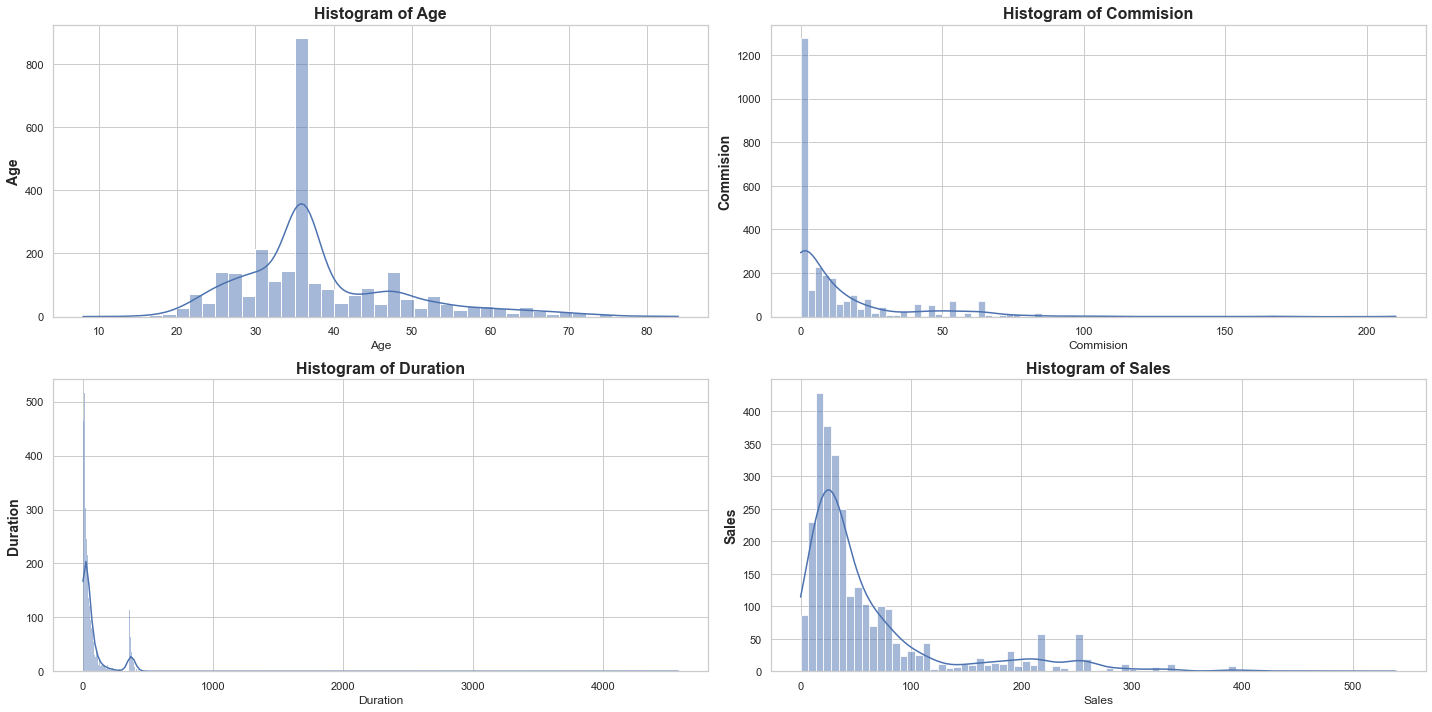

In [585]:
Features = list(df.select_dtypes(include=['float64','int64']).columns)
x = 0
plt.figure(figsize = (20,10))
for i in range(0,len(Features)):
        x = x + 1
        plt.subplot(2,2,x)
        sns.histplot(df[Features[i]], kde=True)
        plt.title(f"Histogram of {Features[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel(Features[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

#### Calculate Skewness of the numeric fields

In [586]:
for i in Features:
    print(f"Skewness of {i} is {skew(df[i])}")

Skewness of Age is 1.1033055063719825
Skewness of Commision is 3.1048120098228527
Skewness of Duration is 13.7762832172167
Skewness of Sales is 2.3439260780348756


#### Countplot for Categorical Features

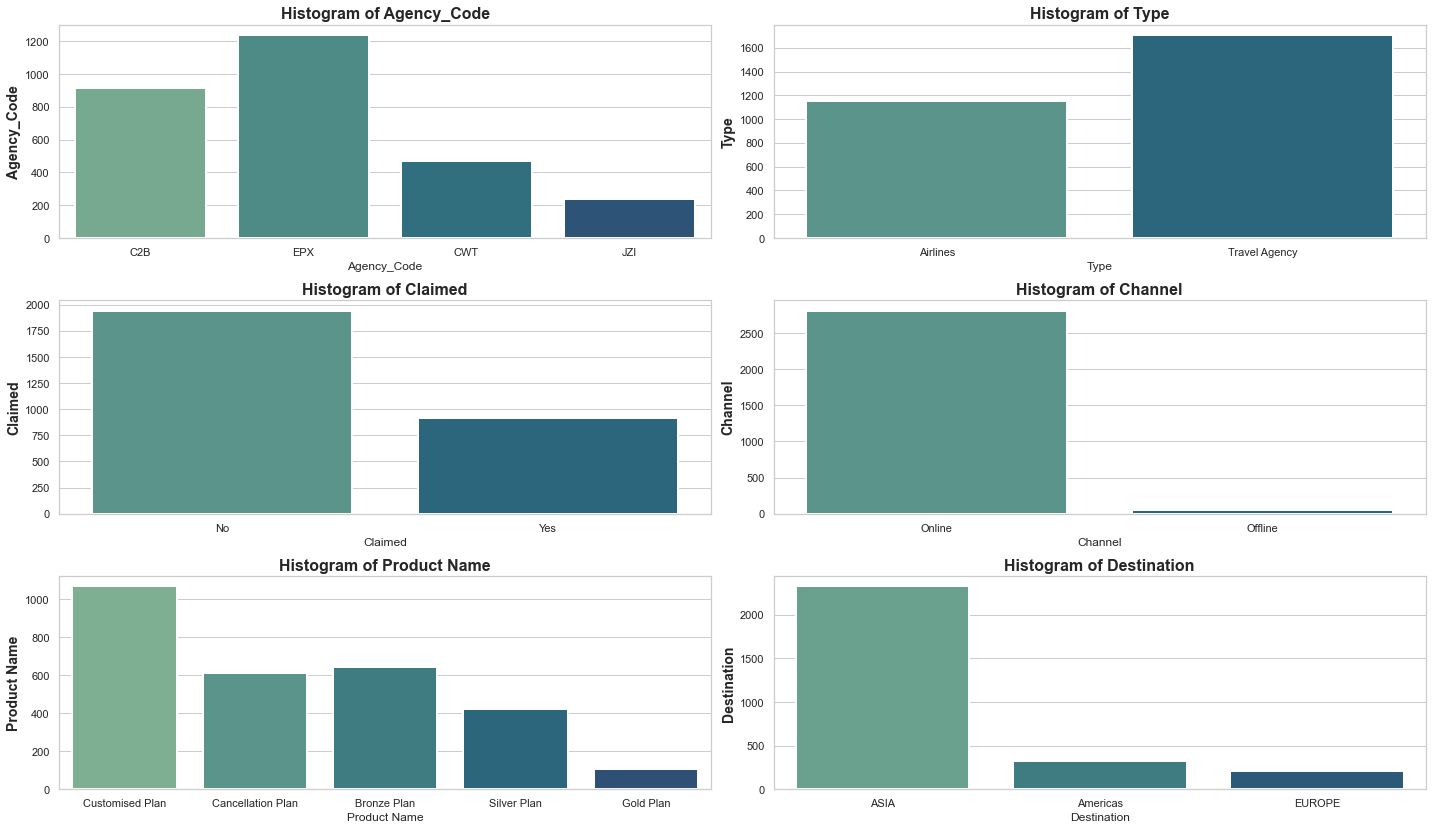

In [587]:
Features = list(df.select_dtypes(include=['object']).columns)
x = 0
plt.figure(figsize = (20,15))
for i in range(0,len(Features)):
        x = x + 1
        plt.subplot(4,2,x)
        sns.countplot(df[Features[i]], palette = 'crest', linewidth=2)
        plt.title(f"Histogram of {Features[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel(Features[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

#### Observations:
1. In Agency_Code, highest count is of EPX and lowest is of JZ1.
2. We have maximum counts for Travel Agency among Airlines & Travel Agency.
3. Most number of Insuarance is not claimed.
4. Most preffered channel is Online.
5. Customised Plan has been bought the most.
6. Maximum number of destination is Asia.

#### Bivariant Analysis
This can be done both by PairPlot and Correlation Heat Map
#### Pair Plot

<Figure size 720x2160 with 0 Axes>

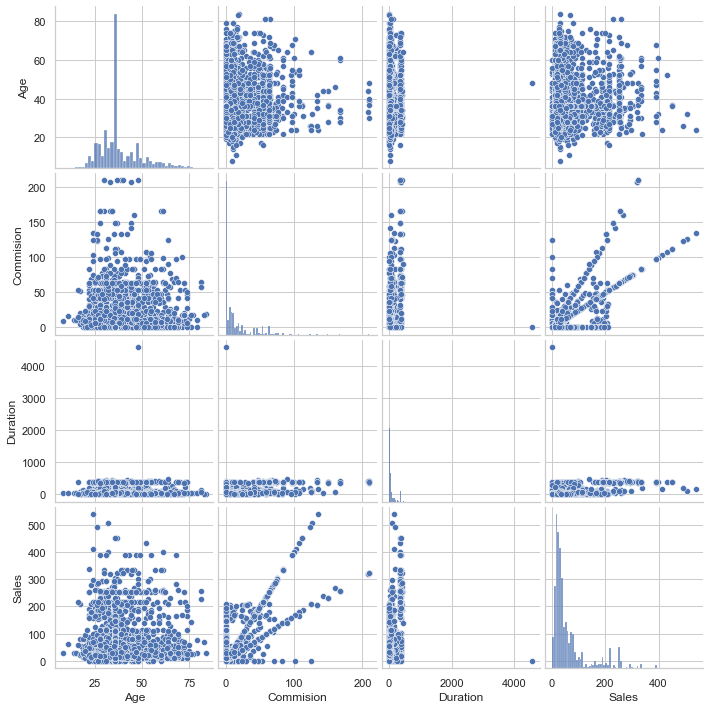

In [588]:
plt.figure(figsize = (10,30));
sns.pairplot(data = df);
plt.show();

#### Observations:
1. Positive cavairance can be observed in spending-advance_payments, current_balance-spending, spending-credit_limit etc.
2. Negative Covairance can be observed in probability_of_full_payment-min_payment_amt etc.
3. No cavariance seen in max_spent_in_single_shopping-probability_of_full_payment, probability_of_full_payment-credit_limit etc.

#### Heat Map

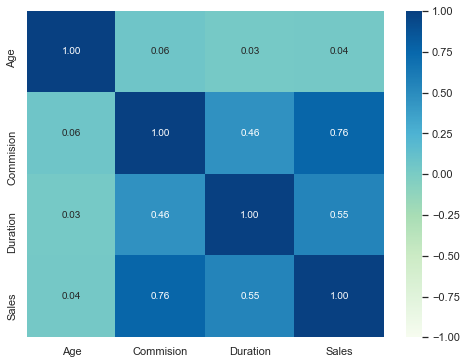

In [589]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr,annot=True, fmt=".2f", cmap='GnBu',
           vmin=-1, vmax=1);

#### Observations
1. Some correlation can be observed between commision-Sales.
2. Other than that all other correlations are not significant.

#### BoxPlot

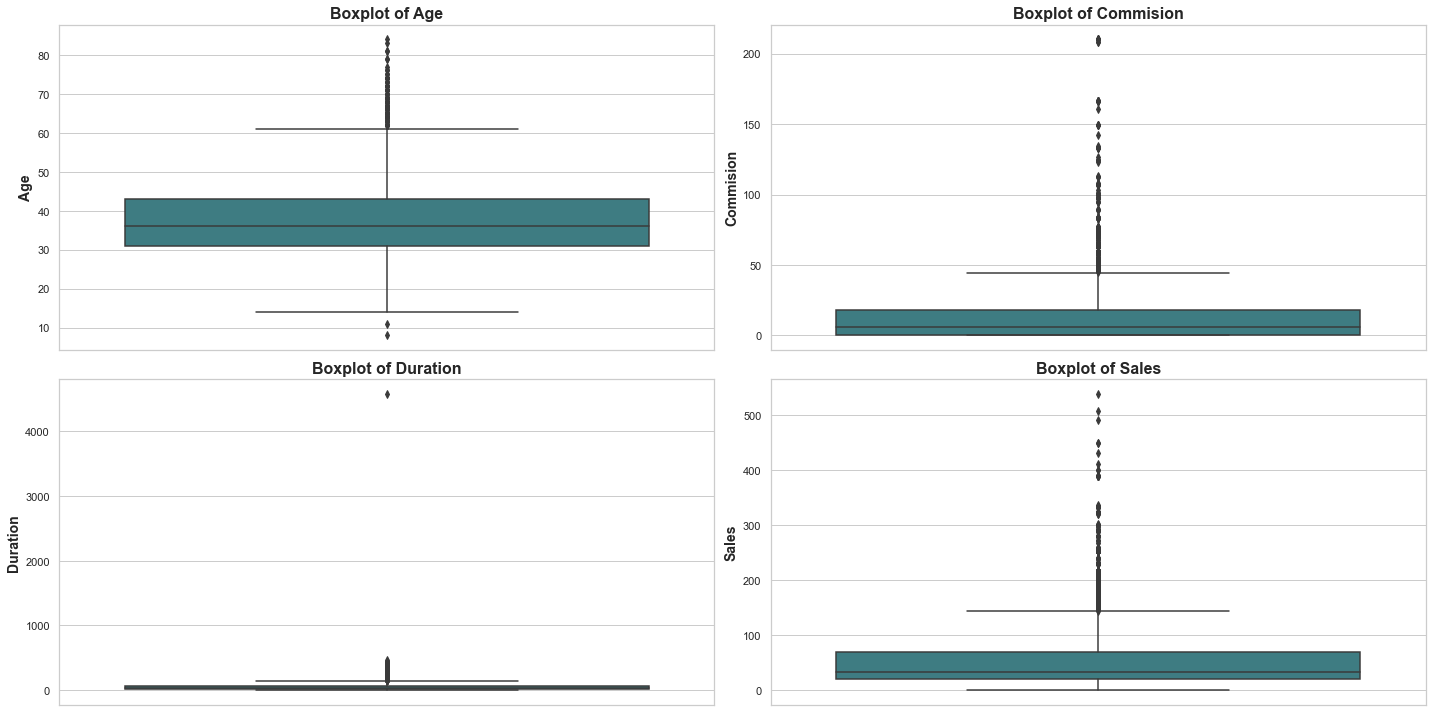

In [590]:
Features_Num = list(df.select_dtypes(include=['float64','int64']).columns)
x = 0
plt.figure(figsize = (20,10))

for i in range(0,len(Features_Num)):
        x = x + 1
        plt.subplot(2,2,x)
        sns.boxplot(y = df[Features_Num[i]], data = df,palette = 'crest')
        plt.title(f"Boxplot of {Features_Num[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel(Features_Num[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

In [591]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [592]:
for i in Features_Num:
    lr, ur = detect_outliers(df[i])
    df[i] = np.where(df[i] > ur, ur,df[i])
    df[i] = np.where(df[i] < lr, lr,df[i])

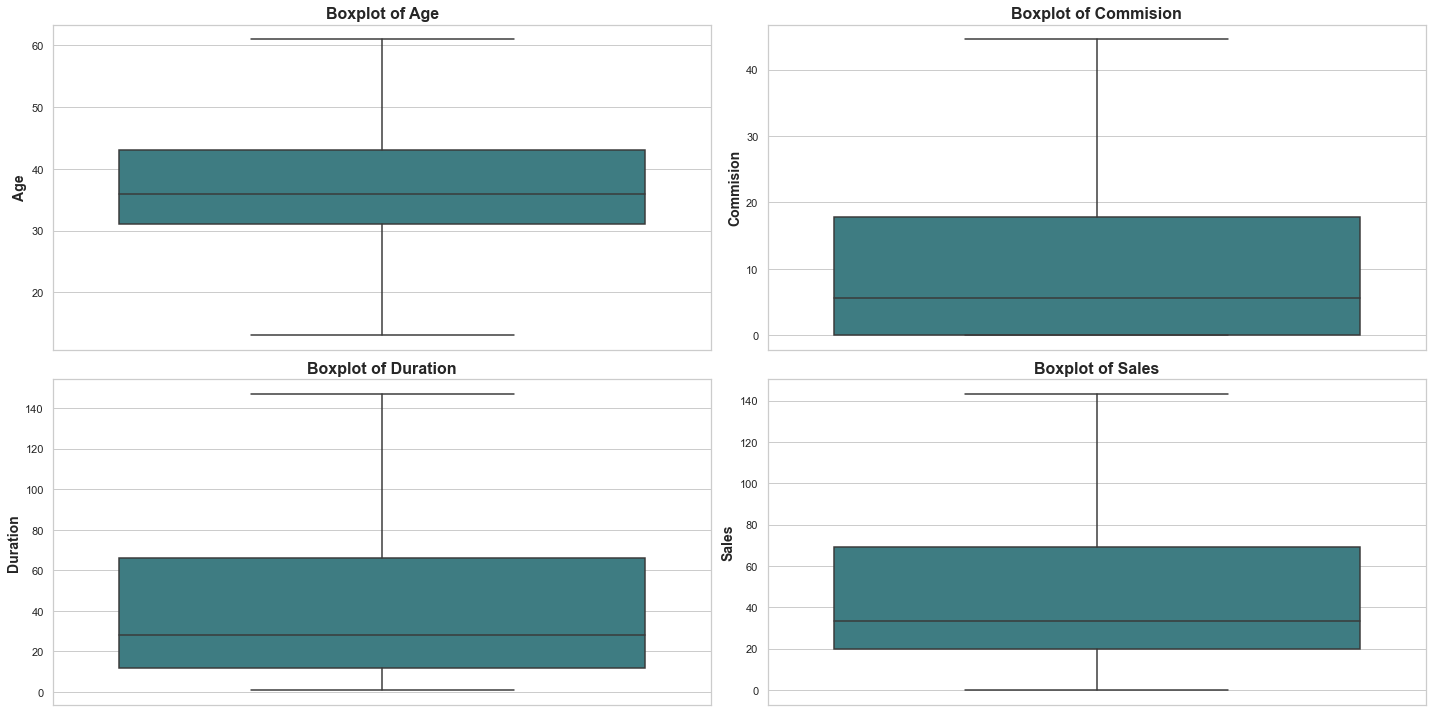

In [593]:
x = 0
plt.figure(figsize = (20,10))

for i in range(0,len(Features_Num)):
        x = x + 1
        plt.subplot(2,2,x)
        sns.boxplot(y = df[Features_Num[i]], data = df,palette = 'crest')
        plt.title(f"Boxplot of {Features_Num[i]}", fontsize = 16, fontweight='bold')
        plt.ylabel(Features_Num[i], fontsize = 14, fontweight='bold')
        plt.tight_layout()

#### Scaling

In [594]:
sc = StandardScaler()
df_scaled_num = pd.DataFrame(sc.fit_transform(df.select_dtypes(include=['float64','int64'])),columns = 
df.select_dtypes(include=['float64','int64']).columns)

In [595]:
df_scaled_num

,Age,Commision,Duration,Sales
0,1.028745,-0.713265,-0.854089,-1.140821
1,-0.193222,-0.758443,-0.283133,-0.730087
2,0.112270,-0.375071,-0.938675,-0.967275
3,-0.193222,-0.758443,-0.917529,-0.589184
4,-0.498713,-0.351836,0.118651,-0.777055
...,...,...,...,...
2853,-1.007866,2.116852,2.106426,2.164303
2854,-0.295052,0.112858,-0.896382,0.068365
2855,-0.193222,-0.758443,0.139798,-0.542216
2856,-0.396883,-0.265351,-0.177400,-0.482332


In [596]:
df_scaled = pd.concat([df_scaled_num, df.select_dtypes(include=['object'])], axis=1)

In [597]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2858.0,1.818388e-16,1.000175,-2.535324,-0.702374,-0.193222,0.519592,2.352543
Commision,2858.0,2.340541e-17,1.000175,-0.758443,-0.758443,-0.395078,0.391675,2.116852
Duration,2858.0,2.159846e-17,1.000175,-0.980968,-0.748357,-0.410012,0.393556,2.106426
Sales,2858.0,1.015633e-16,1.000175,-1.199765,-0.730087,-0.413055,0.427669,2.164303


## Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network
### Converting all objects to categorical codes

In [598]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2858 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2858 non-null   float64
 1   Agency_Code   2858 non-null   int8   
 2   Type          2858 non-null   int8   
 3   Claimed       2858 non-null   int8   
 4   Commision     2858 non-null   float64
 5   Channel       2858 non-null   int8   
 6   Duration      2858 non-null   float64
 7   Sales         2858 non-null   float64
 8   Product Name  2858 non-null   int8   
 9   Destination   2858 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 208.4 KB


In [600]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


#### Proportion of 1s and 0s

In [601]:
df.Claimed.value_counts(normalize=True).reset_index()

,index,Claimed
0,0,0.680196
1,1,0.319804


There is no issue of class imbalance here as we have reasonable proportions in both the classes

In [602]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2858.0,37.897481,9.821953,13.0,31.0,36.00,43.00,61.00
Agency_Code,2858.0,1.280966,1.003212,0.0,0.0,2.00,2.00,3.00
Type,2858.0,0.597971,0.490394,0.0,0.0,1.00,1.00,1.00
Claimed,2858.0,0.319804,0.466482,0.0,0.0,0.00,1.00,1.00
Commision,2858.0,11.751365,15.496770,0.0,0.0,5.63,17.82,44.55
Channel,2858.0,0.983905,0.125864,0.0,1.0,1.00,1.00,1.00
Duration,2858.0,47.389083,47.297343,1.0,12.0,28.00,66.00,147.00
Sales,2858.0,51.088849,42.589817,0.0,20.0,33.50,69.30,143.25
Product Name,2858.0,1.667600,1.277716,0.0,1.0,2.00,2.00,4.00
Destination,2858.0,0.262071,0.586485,0.0,0.0,0.00,0.00,2.00


#### Extracting the target column into separate vectors for training set and test set

In [603]:
X = df.drop("Claimed", axis=1)

y = df["Claimed"]

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


#### Splitting data into training and test set

In [604]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=123, stratify = y)

#### Checking the dimensions of the training and test data

In [605]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2000, 9)
X_test (858, 9)
train_labels (2000,)
test_labels (858,)


### Building a Decision Tree Classifier

In [606]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [626]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],# 5,7,9
    'min_samples_leaf': [20,40,60], # 1-3% 50-150
    'min_samples_split': [60,120,180] # 150 - 450
}

dtcl = DecisionTreeClassifier(random_state = 123)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [627]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 60, 'min_samples_split': 180}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 180}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=180,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

#### Generating Tree

In [628]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

#### Variable Importance

In [629]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.545582
Sales         0.195672
Product Name  0.120670
Duration      0.067801
Commision     0.032282
Age           0.030816
Destination   0.007178
Type          0.000000
Channel       0.000000


#### Predicting on Training and Test dataset

In [630]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

#### Getting the Predicted Classes and Probs

In [631]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.800000,0.200000
1,0.164706,0.835294
2,0.750000,0.250000
3,0.778761,0.221239
4,0.750000,0.250000


### Model Evaluation
#### AUC and ROC for the training data

In [632]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

AUC: 0.826


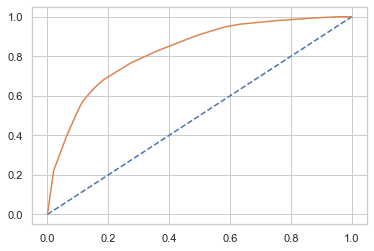

In [633]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr);

#### AUC and ROC for the test data

AUC: 0.818


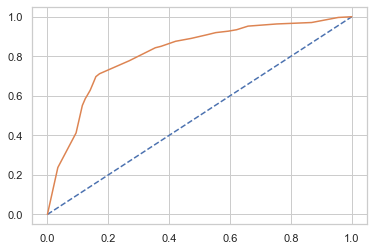

In [634]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr);

### Confusion Matrix for the training data

In [635]:
cm1 = confusion_matrix(train_labels, ytrain_predict)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[1200  160]
 [ 272  368]]


In [636]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 * 100 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1 * 100)

Sensitivity :  88.23529411764706
Specificity :  57.49999999999999


In [637]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.784

In [645]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1360
           1       0.70      0.57      0.63       640

    accuracy                           0.78      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.78      0.78      0.78      2000



In [639]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.57
cart_train_f1  0.63


### Confusion Matrix for test data

In [640]:
cm1 = confusion_matrix(test_labels, ytest_predict)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[510  74]
 [112 162]]


In [641]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 * 100 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1 * 100)

Sensitivity :  87.32876712328768
Specificity :  59.12408759124088


In [642]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7832167832167832

In [643]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       584
           1       0.69      0.59      0.64       274

    accuracy                           0.78       858
   macro avg       0.75      0.73      0.74       858
weighted avg       0.78      0.78      0.78       858



In [644]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.69
cart_train_recall  0.59
cart_train_f1  0.64


#### Cart Conclusion
1. Train Data:
    1. AUC: 82.6%
    2. Accuracy: 78.4%
    3. Sensitivity: 88.2%
    4. Precision: 70%
    5. Recall: 57%
    6. f1-Score: 63%
2. Test Data:
    1. AUC: 81.8%
    2. Accuracy: 78.3%
    3. Sensitivity: 87.3%
    4. Precision: 69%
    5. Recall: 59%
    5. f1-Score: 64%
    
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.
Agency_Code is the most important variable for predicting claims.

### Building a Random Forest Classifier
#### Grid Search for finding out the optimal values for the hyper parameters
Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will lead to performance issues and model will run for much longer time

In [648]:
from sklearn.ensemble import RandomForestClassifier

In [650]:
param_grid = {
    'max_depth': [10],
    'max_features': [6],
    'min_samples_leaf': [10],
    'min_samples_split': [50],
    'n_estimators': [300]
}

rfcl = RandomForestClassifier(random_state = 123)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [651]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=123,
                                 

In [652]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [653]:
best_grid = grid_search.best_estimator_

In [654]:
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

#### Predicting the Training and Testing data

In [655]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

#### RF Model Performance Evaluation on Training data

In [668]:
cm1 = confusion_matrix(train_labels,ytrain_predict)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[1217  143]
 [ 261  379]]


In [669]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 * 100 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1 * 100)

Sensitivity :  89.48529411764706
Specificity :  59.21875


In [657]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.798

In [658]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1360
           1       0.73      0.59      0.65       640

    accuracy                           0.80      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.79      0.80      0.79      2000



In [659]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.73
rf_train_recall  0.59
rf_train_f1  0.65


Area under Curve is 0.7435202205882354


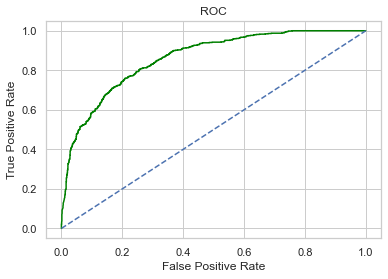

In [660]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

#### RF Model Performance Evaluation on Test data

In [673]:
cm1 = confusion_matrix(test_labels,ytest_predict)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[506  78]
 [105 169]]


In [672]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 * 100 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1 * 100)

Sensitivity :  86.64383561643835
Specificity :  61.67883211678832


In [662]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7867132867132867

In [663]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       584
           1       0.68      0.62      0.65       274

    accuracy                           0.79       858
   macro avg       0.76      0.74      0.75       858
weighted avg       0.78      0.79      0.78       858



In [664]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.62
rf_test_f1  0.65


Area under Curve is 0.7416133386661333


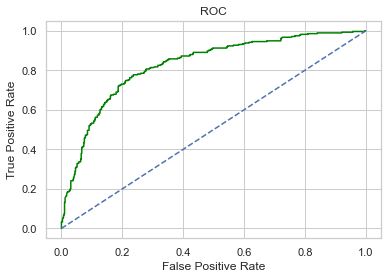

In [665]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [666]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.351272
Sales         0.196934
Product Name  0.171991
Duration      0.100257
Commision     0.080783
Age           0.069449
Type          0.015376
Destination   0.012187
Channel       0.001751


#### Random Forest Conclusion
1. Train Data:
    1. AUC: 74.3%
    2. Accuracy: 79.8%
    3. Sensitivity: 89.4%
    4. Precision: 73%
    5. Recall: 59%
    6. f1-Score: 65%
2. Test Data:
    1. AUC: 74.1%
    2. Accuracy: 78.6%
    3. Sensitivity: 86.6%
    4. Precision: 68%
    5. Recall: 62%
    5. f1-Score: 65%

### Building a Neural Network Classifier

In [675]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [677]:
from sklearn.neural_network import MLPClassifier

In [681]:
param_grid = {
    'hidden_layer_sizes': [100,50,200],
    'max_iter': [7000,5000,2500],
    'solver': ['adam','sgd'], 
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state = 123)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [682]:
grid_search.fit(X_train_scaled, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 200, 'max_iter': 7000, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 200, 'max_iter': 7000, 'solver': 'adam', 'tol': 0.01}

In [683]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=200, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=7000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### Predicting the Training and Testing data

In [684]:
ytrain_predict = best_grid.predict(X_train_scaled)
ytest_predict = best_grid.predict(X_test_scaled)

#### NN Model Performance Evaluation on Training data

In [685]:
cm1 = confusion_matrix(train_labels,ytrain_predict)
cm1

array([[1215,  145],
       [ 321,  319]])

In [686]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 * 100 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1 * 100)

Sensitivity :  89.33823529411765
Specificity :  49.84375


In [687]:
nn_train_acc=best_grid.score(X_train_scaled,train_labels) 
nn_train_acc

0.767

In [688]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1360
           1       0.69      0.50      0.58       640

    accuracy                           0.77      2000
   macro avg       0.74      0.70      0.71      2000
weighted avg       0.76      0.77      0.76      2000



In [689]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.69
nn_train_recall  0.5
nn_train_f1  0.58


Area under Curve is 0.6202205882352941


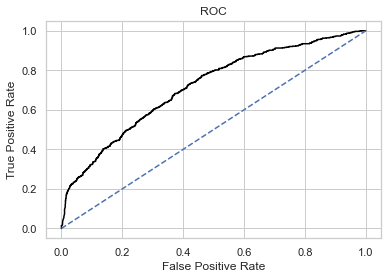

In [690]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

#### NN Model Performance Evaluation on Test data

In [703]:
cm1 = confusion_matrix(test_labels,ytest_predict)
cm1

array([[520,  64],
       [135, 139]])

In [704]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 * 100 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1 * 100)

Sensitivity :  89.04109589041096
Specificity :  50.72992700729927


In [692]:
nn_test_acc=best_grid.score(X_test_scaled,test_labels)
nn_test_acc

0.7680652680652681

In [693]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       584
           1       0.68      0.51      0.58       274

    accuracy                           0.77       858
   macro avg       0.74      0.70      0.71       858
weighted avg       0.76      0.77      0.76       858



In [694]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.68
nn_test_recall  0.51
nn_test_f1  0.58


Area under Curve is 0.6291058394160585


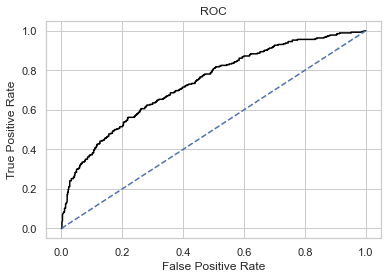

In [695]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [701]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=200, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=7000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)>

#### Neural Network Conclusion
1. Train Data:
    1. AUC: 62%
    2. Accuracy: 89.3%
    3. Sensitivity: 89.4%
    4. Precision: 69%
    5. Recall: 50%
    6. f1-Score: 58%
2. Test Data:
    1. AUC: 62.9%
    2. Accuracy: 76.8%
    3. Sensitivity: 89.04%
    4. Precision: 68%
    5. Recall: 51%
    5. f1-Score: 58%

### Final Conclusion
#### Comparison of the performance metrics from the 3 models

In [698]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.78,0.80,0.79,0.77,0.77
AUC,0.83,0.82,0.74,0.74,0.62,0.63
Recall,0.57,0.59,0.59,0.62,0.50,0.51
Precision,0.70,0.69,0.73,0.68,0.69,0.68
F1 Score,0.63,0.64,0.65,0.65,0.58,0.58


#### ROC Curve for the 3 models on the Training data

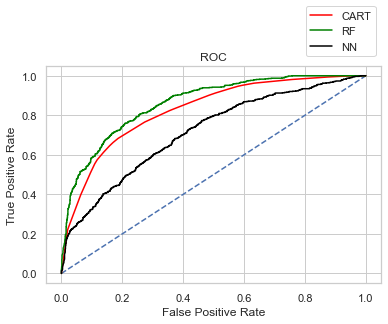

In [699]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART");
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF");
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN");
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC');
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

#### ROC Curve for the 3 models on the Test data

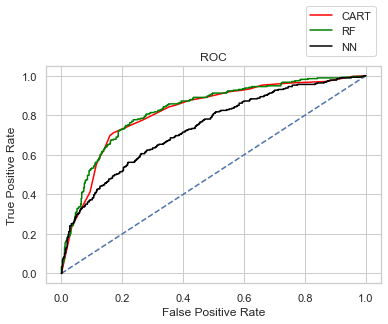

In [700]:
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART");
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF");
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN");
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC');
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');